In [ ]:
!apt-get -qq install -y libsm6 libxext6 && pip install -q -U opencv-python
import cv2


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.2/62.2 MB 12.8 MB/s eta 0:00:00


Question(1). Take the Lena image shown below with input in size 64×64 and zoom the
image to 128×128 using bilinear interpolation and show both the images in a
single window using subplot in Matlab or any other equivalent functions in
python. (Do not use the inbuilt functions to zoom and interpolate the
image. Create your own biqubic interpolation function to interpolate the
image. Can use inbuilt functions to read and show the image)

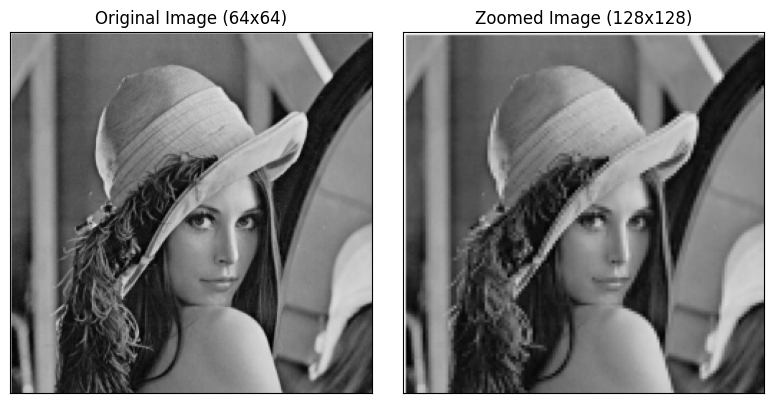

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the Lena image (64x64)
lena_image = cv2.imread("Lena image.png", cv2.IMREAD_GRAYSCALE)

# Define the bilinear interpolation function
def bilinear_interpolation(image, new_size):
    original_height, original_width = image.shape
    new_height, new_width = new_size

    zoomed_image = np.zeros((new_height, new_width), dtype=np.uint8)

    for i in range(new_height):
        for j in range(new_width):
            y = i / (new_height - 1) * (original_height - 1)
            x = j / (new_width - 1) * (original_width - 1)

            x0 = int(x)
            x1 = min(x0 + 1, original_width - 1)  # Ensure x1 stays within bounds
            y0 = int(y)
            y1 = min(y0 + 1, original_height - 1)  # Ensure y1 stays within bounds

            a = x - x0
            b = y - y0

            # Interpolate values using bilinear interpolation
            zoomed_pixel = (1 - a) * (1 - b) * image[y0][x0] + a * (1 - b) * image[y0][x1] + \
                           (1 - a) * b * image[y1][x0] + a * b * image[y1][x1]

            zoomed_image[i][j] = zoomed_pixel

    return zoomed_image

# Zoom the image using bilinear interpolation
zoomed_image = bilinear_interpolation(lena_image, (128, 128))

# Display both images in subplots
plt.figure(figsize=(8, 4))
plt.subplot(121)
plt.imshow(lena_image, cmap="gray")
plt.title("Original Image (64x64)")
plt.xticks([]), plt.yticks([])

plt.subplot(122)
plt.imshow(zoomed_image, cmap="gray")
plt.title("Zoomed Image (128x128)")
plt.xticks([]), plt.yticks([])

plt.tight_layout()
plt.show()


2. Take the grayscale Lena image. Image size should be larger than 256×256.
Compute the connected components over 16×16 non-overlapping blocks using
V= {150-200} and 4, 8 adjacencies. The program should be adaptable. User
should be able to change the V set and adjacency to obtain a different set of
connected component. The set V will always be defined using a range of values
as given in the problem. The output image should show all the blocks together
in a single image. (Do not use the inbuilt functions to compute the
connected components of the image. Create your own function to
compute the connected components of the image. Can use inbuilt
functions to read and show the image)

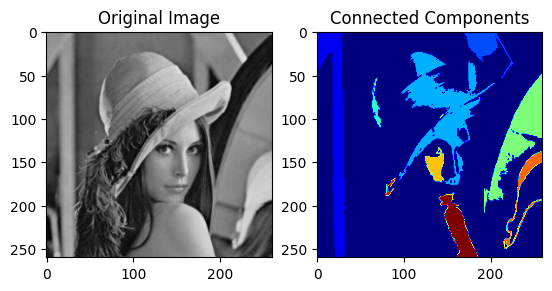

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def connected_components(img,threshold_range,connectivity):
    labels=np.zeros_like(img,dtype=int)
    label_count=1
    def dfs(x,y,current_label):
        stack=[(x,y)]
        while stack:
            x,y=stack.pop()
            if x<0 or y<0 or x>=img.shape[0] or y>=img.shape[1]:
                continue
            if labels[x, y]!=0 or img[x,y] not in threshold_range:
                continue
            labels[x, y]=current_label
            for i in range(-1,2):
                for j in range(-1,2):
                    if connectivity==4 and abs(i)+abs(j)==2:
                        continue
                    stack.append((x+i,y+j))
    for i in range(0,img.shape[0],16):
        for j in range(0,img.shape[1],16):
            current_pixel=img[i,j]
            if current_pixel in threshold_range and labels[i,j]==0:
                dfs(i,j,label_count)
                label_count+=1
    return labels
img = cv2.imread(r"/content/Lena image.png", cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img,(260,260))
threshold_range = range(150,200)
connectivity = 4
connected_components_img = connected_components(img,threshold_range,connectivity)

plt.subplot(1,2,1)
plt.imshow(img,cmap='gray')
plt.title('Original Image')

plt.subplot(1,2,2)
plt.imshow(connected_components_img,cmap='jet')
plt.title('Connected Components')

plt.show()

Question(3). Take the Lena image shown as input in size 64×64. Add white Gaussian
noise to the image to generate a noisy image. Compute average over 5, 10, and
20 noisy images and show the result.


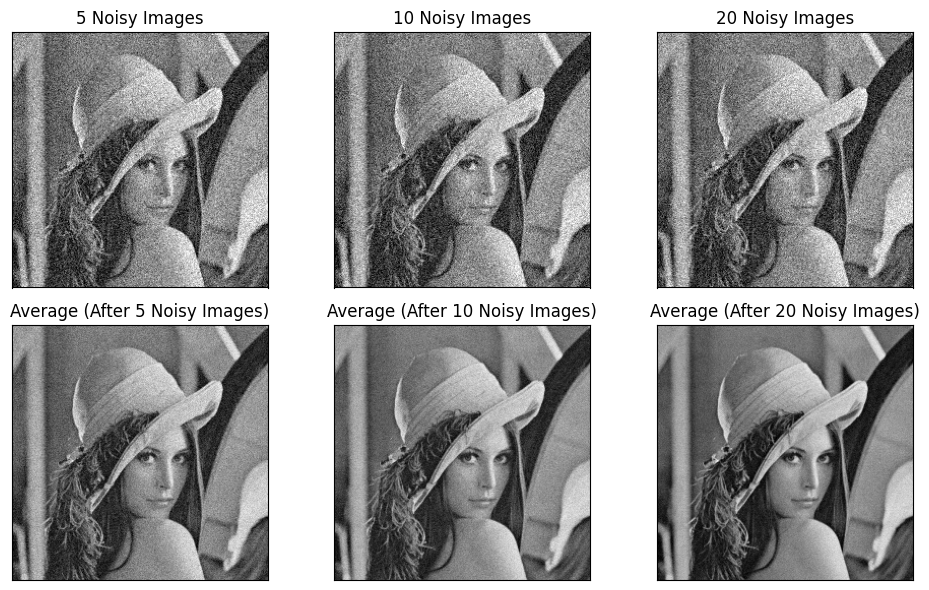

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt  # for visualization (optional)

# Load the original Lena image (assuming it's in the same directory)
lena_image = cv2.imread("Lena image.png", cv2.IMREAD_GRAYSCALE)

# Check for image loading errors
if lena_image is None:
    print("Error: Could not load image 'Lena image.png'")
    exit()

# Function to generate a single noisy image with white Gaussian noise
def generate_noisy_image(image):
    noise = np.random.normal(0, 25, image.shape)  # Gaussian noise with mean 0 and std 255
    noisy_image = np.clip(image + noise, 0, 255).astype(np.uint8)
    return noisy_image

# Generate noisy images with different numbers
num_noisy_images_list = [5, 10, 20]
noisy_images_sets = []
average_images = []

for num_noisy_images in num_noisy_images_list:
    noisy_images = []
    for _ in range(num_noisy_images):
        noisy_image = generate_noisy_image(lena_image.copy())  # Use a copy to avoid modifying original
        noisy_images.append(noisy_image)

    # Compute average (corrected for nested list structure)
    average_image = np.mean(noisy_images, axis=0).astype(np.uint8)
    noisy_images_sets.append(noisy_images)
    average_images.append(average_image)

# Optional: Visualize results using matplotlib
plt.figure(figsize=(10, 6))
for i, num_noisy_images in enumerate(num_noisy_images_list):
    plt.subplot(2, 3, i + 1)
    plt.imshow(noisy_images_sets[i][0], cmap="gray")  # Show one noisy image as an example
    plt.title(f"{num_noisy_images} Noisy Images")
    plt.xticks([]), plt.yticks([])  # Hide axes for better visualization

    plt.subplot(2, 3, i + 4)
    plt.imshow(average_images[i], cmap="gray")
    plt.title(f"Average (After {num_noisy_images} Noisy Images)")
    plt.xticks([]), plt.yticks([])  # Hide axes for better visualization

plt.tight_layout()
plt.show()
